# Popularity Analysis

<b>Author:</b> Miraya Gupta\
<i>Code for Creating Dataframes section from Audrey Y</i>\
This notebook contains the code for the comparative popularity analysis of the videos from the test runs

## Table of Contents
1. [Creating Dataframes](#creating-dataframes)
2. [Calculating Metrics](#calculating-metrics)
3. [Plotting Metrics](#plotting-metrics)
4. [Popularity Metrics for Saved Videos - Creating DFs](#popularity-metrics)
5. [Popularity Metrics for Saved Videos - Analysis and Graphics](#analysis-and-graphics)
6. [Popularity Analysis by User over Time](#by-user-over-time)

## 1. Creating Dataframes<a id="creating-dataframes"></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mpl
import numpy as np

/var/folders/s4/l0gcsjqs6nddgzrcdh2gfp480000gn/T/ipykernel_1322/577283645.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
files = os.listdir('data') # function lists the content of a directory
files

['02-14-16-57_save_data_all_videos_AY.csv',
 '02-17-15-00_data_saved_videos.csv',
 '02-17-17-31_data_saved_videosMG.csv',
 '02-19-09-27_data_saved_videos_JR.csv',
 '02-17-17-55_save_data_all_videosMG.csv',
 '02-15-09-13_data_saved_videos_AY.csv',
 '02-17-21-37_control_data_all_videos.JK.csv',
 '02-19-16-17_data_saved_videosMG.csv',
 '02-14-16-57_data_saved_videos_AY.csv',
 '.DS_Store',
 '02-19-16-17_save_data_all_videosMG.csv',
 '02-19-09-27_save_data_all_videos_JR.csv',
 '02-14-22-45_control_data_all_videos_AY.csv',
 '02-17-21-37_data_saved_videos.JK.csv',
 '02-19-16-37_control_data_all_videosMG.csv',
 '02-17-17-30_control_data_all_videosMG.csv',
 '02-19-09-26_control_data_all_videos_JR.csv',
 '02-15-11-17_control_data_all_videos_AY.csv',
 '02-15-13-57_data_saved_videos_AY.csv',
 '02-17-18-03_save_data_all_videos_JR.csv',
 '02-14-22-46_save_data_all_videos_AY.csv',
 '02-18-21-38_control_data_all_videos.JK.csv',
 '02-17-14-15_save_data_all_videos.JK.csv',
 '02-19-13-49_save_data_all_vi

In [7]:
# create tuples for each pair during data collection
onlyAllData = [f for f in files if 'data_all' in f]     # filter out saved videos
onlyAllData = sorted(onlyAllData)

collection_times = []

for i in range(0, len(onlyAllData) - 1, 2):
    collection_times.append((onlyAllData[i][:11], onlyAllData[i+1][:11]))

print(collection_times)

[('02-14-16-57', '02-14-16-57'), ('02-14-17-04', '02-14-17-05'), ('02-14-19-03', '02-14-19-04'), ('02-14-20-33', '02-14-20-34'), ('02-14-22-45', '02-14-22-46'), ('02-15-09-13', '02-15-09-13'), ('02-15-11-17', '02-15-11-18'), ('02-15-13-57', '02-15-13-57'), ('02-15-17-25', '02-15-17-26'), ('02-15-19-11', '02-15-19-11'), ('02-15-20-03', '02-15-20-04'), ('02-15-21-19', '02-15-21-22'), ('02-17-13-50', '02-17-13-50'), ('02-17-14-15', '02-17-14-15'), ('02-17-14-55', '02-17-15-00'), ('02-17-15-31', '02-17-15-32'), ('02-17-16-02', '02-17-16-02'), ('02-17-17-20', '02-17-17-20'), ('02-17-17-30', '02-17-17-31'), ('02-17-17-54', '02-17-17-55'), ('02-17-18-03', '02-17-18-03'), ('02-17-20-14', '02-17-20-15'), ('02-17-20-44', '02-17-20-44'), ('02-17-21-37', '02-17-21-37'), ('02-17-22-09', '02-17-22-10'), ('02-18-21-12', '02-18-21-12'), ('02-18-21-38', '02-18-21-38'), ('02-19-07-17', '02-19-07-18'), ('02-19-08-00', '02-19-08-01'), ('02-19-08-45', '02-19-08-46'), ('02-19-09-26', '02-19-09-27'), ('02-19

In [8]:
## Helper functions
def createPostID(row):
    """helper function: create a new value using music and author"""
    return f"{row['music']}_{row['author']}"

# for splitting hashtags  
splitter = lambda x: np.nan if pd.isna(x) else [s.strip() for s in str(x).split(',')]
# create 3 dfs: control data, save data, all data

In [9]:
control_dfs = []
save_dfs = []
all_dfs = []

for fN in onlyAllData: # folder with files that have all posts
    path = os.path.join('data', fN) # create file path
    df = pd.read_csv(path) # create dataframe

    # add column to indicate date/time collected
    df['collectionTime'] = fN[:11]

    # add column with unique post id
    df['postID'] = df.apply(createPostID, axis=1) # use axis=1 to process one row at a time

    # split hashtags into list
    #df['hashtag'] = df['hashtag'].apply(splitter)

    if 'control'in fN:
        control_dfs.append(df)
    else:
        save_dfs.append(df)

    all_dfs.append(df)


df_control = pd.concat(control_dfs, ignore_index=True)
df_save = pd.concat(save_dfs, ignore_index=True)
df_all = pd.concat(all_dfs, ignore_index=True)

print("control shape:", df_control.shape)
print("save shape:", df_save.shape)
print("all data shape:", df_all.shape)

control shape: (15761, 11)
save shape: (14840, 11)
all data shape: (30601, 11)


In [10]:
df_control.head() #testing

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
0,1,0,original sound - ®️ Louieveegang💙,@louieveemoonteenmoonfam,louieveedee,297300,1571,20300,721,02-14-16-57,original sound - ®️ Louieveegang💙_louieveedee
1,1,1,original sound - dayz915,"atodamadre%F0%9F%8F%A7, %F0%9F%A4%99%F0%9F%8F%...",dayz.915,522299,3713,36500,142900,02-14-16-57,original sound - dayz915_dayz.915
2,1,2,original sound - DermDoctor | Dr. Shah,"@poblanopepp, dermatographia",dermdoctor,430100,4758,24900,6591,02-14-16-57,original sound - DermDoctor | Dr. Shah_dermdoctor
3,1,3,original sound - 𝐝𝐢𝐧𝐨 🎀,"@lashedchars, fy, fyp, fyp%E3%82%B7%E3%82%9Avi...",marschvarl,251,29,31,0,02-14-16-57,original sound - 𝐝𝐢𝐧𝐨 🎀_marschvarl
4,1,4,original sound - AfroSamuraiT,"lifehack, lifehacks, challenge, ksi, prime",afrosamuraitt,65200,3487,11700,189,02-14-16-57,original sound - AfroSamuraiT_afrosamuraitt


In [11]:
df_save.head() #testing

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
0,1,0,original sound - ESPN,"@wendy.bri, snow, cold",espn,2000000,19900,170800,108600,02-14-16-57,original sound - ESPN_espn
1,1,1,I Have No Enemies - ★DGK132105,"@asianjeffontop, toastyog, streamer, fortnite,...",toasty1k,51200,441,3322,59,02-14-16-57,I Have No Enemies - ★DGK132105_toasty1k
2,1,2,Asn - thsituan._.,NaN,ccabots,203000,4712,124700,3817,02-14-16-57,Asn - thsituan._._ccabots
3,1,3,Like That Sped Up - Laila!,"@bareandneutral, ingrown",dermdoctor,357800,561,11300,2068,02-14-16-57,Like That Sped Up - Laila!_dermdoctor
4,1,4,original sound - Funny,NaN,baby_ok7,3100000,34500,378200,81300,02-14-16-57,original sound - Funny_baby_ok7


In [12]:
df_save.tail() #testing

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
14835,3,25,original sound - Carlos_Eduardo_Espina,NaN,carlos_eduardo_espina,110900,4221,7361,8879,02-19-16-37,original sound - Carlos_Eduardo_Espina_carlos_...
14836,3,26,original sound - Aliaz,"fyp, parati, guitar, electricguitar, guitarrae...",aliaz_z,2600000,6576,252300,8312,02-19-16-37,original sound - Aliaz_aliaz_z
14837,3,27,From The Start Laufey - chris(ur fav Lauver),"@msmerli, foodporn, food, foodlovers, foodlove...",abigailfmarquez,1700000,11200,380900,68300,02-19-16-37,From The Start Laufey - chris(ur fav Lauver)_a...
14838,3,28,snooze - sped up audios 🎧,NaN,layloolaaaaaa,4510,283,1007,206,02-19-16-37,snooze - sped up audios 🎧_layloolaaaaaa
14839,3,29,"Suspense, horror, piano and music box - takaya","sitebloquearon, sitebloquea, miexmebloqueo, me...",gabriel_arana,77700,2991,8701,1589,02-19-16-37,"Suspense, horror, piano and music box - takaya..."


In [13]:
df_control.tail()

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
15756,5,20,Let Me Think About It - Ida Corr & Fedde Le Grand,"fyp, viral",tinykook,123900,760,3973,156,02-19-16-37,Let Me Think About It - Ida Corr & Fedde Le Gr...
15757,5,21,original sound - Naturally Melonie,@ichvse,naturallymelonie,1100000,4737,66900,78400,02-19-16-37,original sound - Naturally Melonie_naturallyme...
15758,5,22,dźwięk oryginalny - Twins Style,NaN,twinsstylee,354700,2137,44000,5184,02-19-16-37,dźwięk oryginalny - Twins Style_twinsstylee
15759,5,23,original sound - mcdreamyneuro 🕊🤍,"capcut, teendad, teenparent, girldad, dadsofti...",kayla.dicenso,275100,601,7496,2097,02-19-16-37,original sound - mcdreamyneuro 🕊🤍_kayla.dicenso
15760,5,24,original sound - Ryan Tang,"interview, funny, girlfriend, crush, fyp",itsyaboyryantang,141200,2081,8036,248,02-19-16-37,original sound - Ryan Tang_itsyaboyryantang


## 2. Calculating Metrics <a id="calculating-metrics"></a>

In [14]:
saved_collectionTime = df_save.collectionTime.unique()
print(saved_collectionTime)

['02-14-16-57' '02-14-17-04' '02-14-19-04' '02-14-20-33' '02-14-22-46'
 '02-15-09-13' '02-15-11-18' '02-15-13-57' '02-15-17-25' '02-15-19-11'
 '02-15-20-03' '02-15-21-19' '02-17-13-50' '02-17-14-15' '02-17-15-00'
 '02-17-15-31' '02-17-16-02' '02-17-17-20' '02-17-17-31' '02-17-17-55'
 '02-17-18-03' '02-17-20-14' '02-17-20-44' '02-17-21-37' '02-17-22-10'
 '02-18-21-12' '02-18-21-38' '02-19-07-18' '02-19-08-01' '02-19-08-46'
 '02-19-09-27' '02-19-10-15' '02-19-13-49' '02-19-16-17' '02-19-16-37']


In [15]:
control_collectionTime = df_control.collectionTime.unique()
print(control_collectionTime)

['02-14-16-57' '02-14-17-05' '02-14-19-03' '02-14-20-34' '02-14-22-45'
 '02-15-09-13' '02-15-11-17' '02-15-13-57' '02-15-17-26' '02-15-19-11'
 '02-15-20-04' '02-15-21-22' '02-17-13-50' '02-17-14-15' '02-17-14-55'
 '02-17-15-32' '02-17-16-02' '02-17-17-20' '02-17-17-30' '02-17-17-54'
 '02-17-18-03' '02-17-20-15' '02-17-20-44' '02-17-21-37' '02-17-22-09'
 '02-18-21-12' '02-18-21-38' '02-19-07-17' '02-19-08-00' '02-19-08-45'
 '02-19-09-26' '02-19-10-15' '02-19-13-50' '02-19-16-17' '02-19-16-37']


In [17]:
#Replacing the time stamps in the control dataframe with the corresponding timestamps in the saved dataframe
df_control['collectionTime'].replace({'02-14-17-05': '02-14-17-04', 
                                      '02-14-19-03': '02-14-19-04', 
                                      '02-14-20-34': '02-14-20-33', 
                                      '02-15-17-26':'02-15-17-25', 
                                      '02-15-11-17':'02-15-11-18', 
                                      '02-14-22-45': '02-14-22-46',
                                     '02-15-11-17': '02-15-11-18', 
                                     '02-15-17-26': '02-15-17-25', 
                                      '02-15-20-04': '02-15-20-03', 
                                     '02-15-21-22': '02-15-21-19', 
                                     '02-17-14-55': '02-17-15-00', 
                                     '02-17-15-32': '02-17-15-31', 
                                     '02-17-17-30': '02-17-17-31', 
                                     '02-17-17-54': '02-17-17-55', 
                                     '02-17-20-15': '02-17-20-14',
                                     '02-17-22-09': '02-17-22-10',
                                     '02-19-07-17': '02-19-07-18',
                                      '02-19-08-00': '02-19-08-01',
                                      '02-19-08-45': '02-19-08-46',
                                      '02-19-09-26': '02-19-09-27',
                                      '02-19-13-50': '02-19-13-49'},
                                     inplace=True)

In [18]:
#Testing the replace
df_control.tail() 

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
15756,5,20,Let Me Think About It - Ida Corr & Fedde Le Grand,"fyp, viral",tinykook,123900,760,3973,156,02-19-16-37,Let Me Think About It - Ida Corr & Fedde Le Gr...
15757,5,21,original sound - Naturally Melonie,@ichvse,naturallymelonie,1100000,4737,66900,78400,02-19-16-37,original sound - Naturally Melonie_naturallyme...
15758,5,22,dźwięk oryginalny - Twins Style,NaN,twinsstylee,354700,2137,44000,5184,02-19-16-37,dźwięk oryginalny - Twins Style_twinsstylee
15759,5,23,original sound - mcdreamyneuro 🕊🤍,"capcut, teendad, teenparent, girldad, dadsofti...",kayla.dicenso,275100,601,7496,2097,02-19-16-37,original sound - mcdreamyneuro 🕊🤍_kayla.dicenso
15760,5,24,original sound - Ryan Tang,"interview, funny, girlfriend, crush, fyp",itsyaboyryantang,141200,2081,8036,248,02-19-16-37,original sound - Ryan Tang_itsyaboyryantang


In [19]:
#Testing the replace
df_control[1000:1010]

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,postID
1000,2,11,original sound - emann💕,"fyp%E3%82%B7, makemfamous, blowthisup, viral, ...",yungemann,262400,697,18300,942,02-14-19-04,original sound - emann💕_yungemann
1001,2,12,original sound - HolyGxd ( HolyGod ),NaN,holygxd74,48400,416,3280,2707,02-14-19-04,original sound - HolyGxd ( HolyGod )_holygxd74
1002,2,13,original sound - Raihann,NaN,whodis.mujica,22600,72,621,145,02-14-19-04,original sound - Raihann_whodis.mujica
1003,2,14,original sound - ANAR DREAMS 💎,NaN,pandaboy.us,153400,5854,9253,4128,02-14-19-04,original sound - ANAR DREAMS 💎_pandaboy.us
1004,2,15,som original - Buiu do corte 👏🏼,NaN,alexandersuleymanoff,33400,3583,2005,568,02-14-19-04,som original - Buiu do corte 👏🏼_alexandersuley...
1005,2,16,original sound - Buddy bam,"familyguy, kidnapper, fyp, explorepage",zurielnathan,566800,7305,74600,11700,02-14-19-04,original sound - Buddy bam_zurielnathan
1006,2,17,Very Sad - Enchan,"pourtoi, dayvonjr, memo600, kungvon, booka600,...",0.51melly,134100,3246,11700,483,02-14-19-04,Very Sad - Enchan_0.51melly
1007,2,18,original sound - .,"skipping, school, losers, fyp%E3%82%B7, housto...",5star.liindaa,81700,361,5264,422,02-14-19-04,original sound - ._5star.liindaa
1008,2,19,Suara Seram Sangat Mencekam - Kholil Buitenzorg,"randomfacts, facts, curiosity, knowledge, didy...",__.random.facts.___,8164,11500,1349,7183,02-14-19-04,Suara Seram Sangat Mencekam - Kholil Buitenzor...
1009,2,20,original sound - gracie ౨ৎ,"@omgvalty, zepeto, zepetogirl, zepetocouple",leylaa.zpt,104700,1511,14200,6368,02-14-19-04,original sound - gracie ౨ৎ_leylaa.zpt


In [20]:
def findAverages(popularity_metric):
    """
    This function takes in a popularity metric (likes/shares/comments/saves) as its parameter and calculates the average of that metric 
    at the 4 different timestamps for both the control and experimental groups. The output is a dataframe where the columns are
    control and experimental groups and the rows are averages for different timestamps. 
    """
    results = pd.DataFrame({'collectionTime': [], 'control':[], 'saved': []})
    for time in saved_collectionTime:
        #defining the conditions for selecting rows from the df
        condition_saved = df_save['collectionTime'] == time
        condition_control = df_control['collectionTime'] == time

        #calculating the average of the metric for each timestamp
        average_saved = round(df_save[condition_saved][popularity_metric].mean(), 2)
        average_control = round(df_control[condition_control][popularity_metric].mean(), 2)

        #appending these averages to the result dataframes
        results.loc[len(results.index)] = [time, average_control, average_saved] 

    #returning the dataframe
    return results

In [21]:
#Testing with the likes metric
likes_df = findAverages('likes')
likes_df

,collectionTime,control,saved
0,02-14-16-57,656877.54,638859.33
1,02-14-17-04,821132.85,680968.89
2,02-14-19-04,511200.34,676940.82
3,02-14-20-33,563701.99,567728.18
4,02-14-22-46,678802.59,1146444.71
5,02-15-09-13,503530.24,1564103.49
6,02-15-11-18,521647.96,1138600.43
7,02-15-13-57,550674.89,354334.72
8,02-15-17-25,412137.37,559642.84
9,02-15-19-11,387327.18,545066.88


In [22]:
#Test worked. Creating dfs for each metric
shares_df = findAverages('shares')
comments_df = findAverages('comments')
saves_df = findAverages('saves')

## 3. Plotting Metrics <a id=plotting-metrics></a>

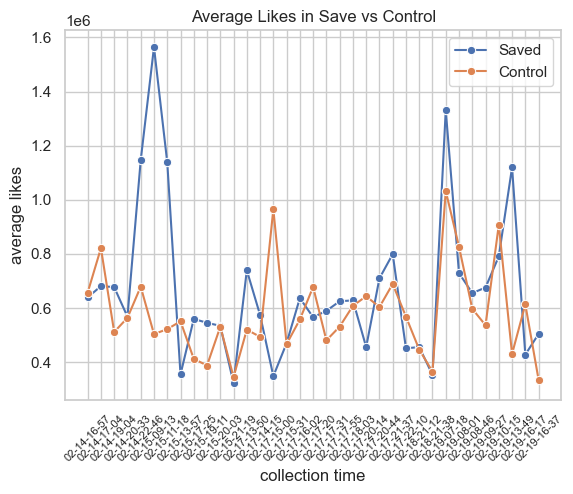

In [27]:
#Creating line plots with seaborn
#LIKES
sns.set(style="whitegrid")
plt_likes = sns.lineplot(x='collectionTime', y='saved', data=likes_df, label = 'Saved', marker ='o')
sns.lineplot(x='collectionTime', y='control', data=likes_df, label = 'Control', marker ='o')
plt_likes.set_xlabel('collection time')
plt_likes.set_ylabel('average likes')
plt_likes.set_title('Average Likes in Save vs Control')
plt_likes.set_xticks(ticks=range(len(collection_times)), labels=likes_df.collectionTime, rotation=45, fontsize=8)

mpl.savefig('likes.png')

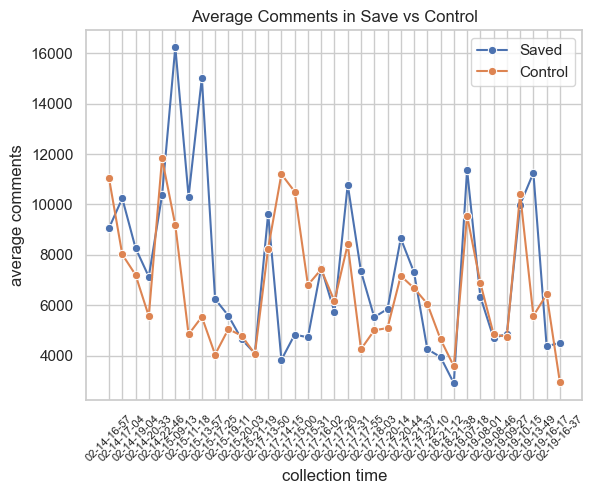

In [28]:
#COMMENTS
plt_comments = sns.lineplot(x='collectionTime', y='saved', data=comments_df, label = 'Saved', marker ='o')
sns.lineplot(x='collectionTime', y='control', data=comments_df, label = 'Control', marker ='o')
plt_comments.set_xlabel('collection time')
plt_comments.set_ylabel('average comments')
plt_comments.set_title('Average Comments in Save vs Control')
plt_comments.set_xticks(ticks=range(len(collection_times)), labels=likes_df.collectionTime, rotation=45, fontsize=8)



mpl.savefig('comments.png')

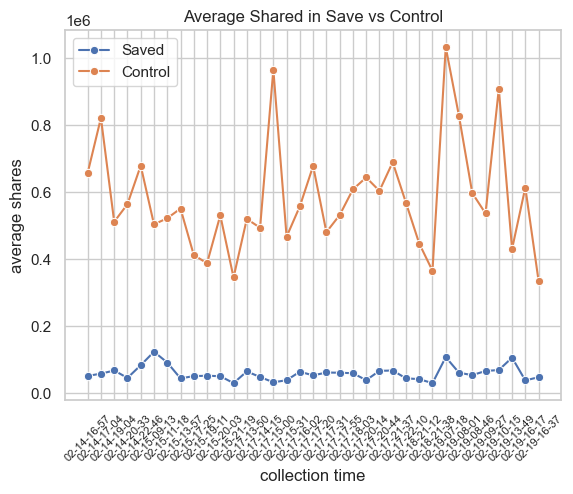

In [29]:
#SHARES
plt_shared = sns.lineplot(x='collectionTime', y='saved', data=shares_df, label = 'Saved', marker ='o')
sns.lineplot(x='collectionTime', y='control', data=likes_df, label = 'Control', marker ='o')
plt_shared.set_xlabel('collection time')
plt_shared.set_ylabel('average shares')
plt_shared.set_title('Average Shared in Save vs Control')
plt_shared.set_xticks(ticks=range(len(collection_times)), labels=likes_df.collectionTime, rotation=45, fontsize=8)

mpl.savefig('shares.png')

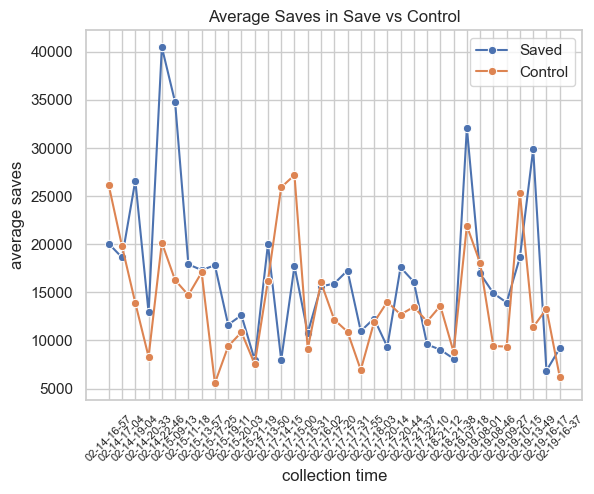

In [31]:
#SAVES
plt_saves = sns.lineplot(x='collectionTime', y='saved', data=saves_df, label = 'Saved', marker ='o')
sns.lineplot(x='collectionTime', y='control', data=saves_df, label = 'Control', marker ='o')
plt_saves.set_xlabel('collection time')
plt_saves.set_ylabel('average saves')
plt_saves.set_title('Average Saves in Save vs Control')
plt_saves.set_xticks(ticks=range(len(collection_times)), labels=likes_df.collectionTime, rotation=45, fontsize=8)


mpl.savefig('saves.png')

## 4. Popularity Metrics for Saved Videos - Creating DFs <a id=popularity-metrics></a>

In [8]:
files = os.listdir('data') # function lists the content of a directory
files

['02-14-16-57_save_data_all_videos_AY.csv',
 '02-17-15-00_data_saved_videos.csv',
 '02-17-17-31_data_saved_videosMG.csv',
 '02-19-09-27_data_saved_videos_JR.csv',
 '02-17-17-55_save_data_all_videosMG.csv',
 '02-15-09-13_data_saved_videos_AY.csv',
 '02-17-21-37_control_data_all_videos.JK.csv',
 '02-19-16-17_data_saved_videosMG.csv',
 '02-14-16-57_data_saved_videos_AY.csv',
 '.DS_Store',
 '02-19-16-17_save_data_all_videosMG.csv',
 '02-19-09-27_save_data_all_videos_JR.csv',
 '02-14-22-45_control_data_all_videos_AY.csv',
 '02-17-21-37_data_saved_videos.JK.csv',
 '02-19-16-37_control_data_all_videosMG.csv',
 '02-17-17-30_control_data_all_videosMG.csv',
 '02-19-09-26_control_data_all_videos_JR.csv',
 '02-15-11-17_control_data_all_videos_AY.csv',
 '02-15-13-57_data_saved_videos_AY.csv',
 '02-17-18-03_save_data_all_videos_JR.csv',
 '02-14-22-46_save_data_all_videos_AY.csv',
 '02-18-21-38_control_data_all_videos.JK.csv',
 '02-17-14-15_save_data_all_videos.JK.csv',
 '02-19-13-49_save_data_all_vi

In [9]:
#checking whether all test runs can be separated
initials = [file[-6:-4] for file in files]
initials

['AY',
 'os',
 'MG',
 'JR',
 'MG',
 'AY',
 'JK',
 'MG',
 'AY',
 '_S',
 'MG',
 'JR',
 'AY',
 'JK',
 'MG',
 'MG',
 'JR',
 'AY',
 'AY',
 'JR',
 'AY',
 'JK',
 'JK',
 'AY',
 'MG',
 'os',
 'JK',
 'os',
 'JR',
 'JR',
 'os',
 'AY',
 'AY',
 'AY',
 'JK',
 'MG',
 'sv',
 'os',
 'JR',
 'AY',
 'JR',
 'JK',
 'os',
 'JR',
 'JR',
 'os',
 'JK',
 'MG',
 'JK',
 'MG',
 'MG',
 'os',
 'JK',
 'AY',
 'JK',
 'JR',
 'JK',
 'AY',
 'os',
 'MG',
 'JK',
 'os',
 'JK',
 'os',
 'JR',
 'os',
 'MG',
 'AY',
 'JR',
 'JR',
 'JK',
 'os',
 'MG',
 'JR',
 'MG',
 'AY',
 'MG',
 'JR',
 'os',
 'JK',
 'JR',
 'AY',
 'AY',
 'os',
 'JR',
 'os',
 'MG',
 'AY',
 'JR',
 'JK',
 'JK',
 'os',
 'JK',
 'os',
 'os',
 'JK',
 'AY',
 'MG',
 'JR',
 'os',
 'JR',
 'MG',
 'os',
 'MG',
 'os',
 'AY',
 'MG']

In [10]:
#getting all files which contain information about the videos that were saved
saved_video_files = [f for f in files if 'data_saved_videos' in f]
saved_video_files = sorted(saved_video_files)
for file in saved_video_files:
    print(file)
print('\nNumber of files:' , len(saved_video_files))

02-14-16-57_data_saved_videos_AY.csv
02-14-17-04_data_saved_videos.csv
02-14-19-04_data_saved_videos_AY.csv
02-14-20-33_data_saved_videos.csv
02-14-22-46_data_saved_videos_AY.csv
02-15-09-13_data_saved_videos_AY.csv
02-15-11-18_data_saved_videos_AY.csv
02-15-13-57_data_saved_videos_AY.csv
02-15-17-25_data_saved_videos.csv
02-15-19-11_data_saved_videos.csv
02-15-20-03_data_saved_videos.csv
02-15-21-19_data_saved_videos.csv
02-17-13-50_data_saved_videos.JKcsv.csv
02-17-14-15_data_saved_videos.JK.csv
02-17-15-00_data_saved_videos.csv
02-17-15-31_data_saved_videos.JK.csv
02-17-16-02_data_saved_videos_JR.csv
02-17-17-20_data_saved_videos_JR.csv
02-17-17-31_data_saved_videosMG.csv
02-17-17-55_data_saved_videosMG.csv
02-17-18-03_data_saved_videos_JR.csv
02-17-20-14_data_saved_videos.JK.csv
02-17-20-44_data_saved_videosMG.csv
02-17-21-37_data_saved_videos.JK.csv
02-17-22-10_data_saved_videosMG.csv
02-18-15-36_data_saved_videos.csv
02-18-21-12_data_saved_videos.JK.csv
02-18-21-38_data_saved_vid

In [11]:
#create individual dataframes for saved videos from each run
all_saved_video_dfs = []
for file in saved_video_files:
    collection_time_videos = file[:11] #first 11 characters are the date of collection

    #creating a dataframe for the set of videos
    path = os.path.join('data', file)
    info_saved_videos_df = pd.read_csv(path)
    info_saved_videos_df['collectionTime'] = collection_time_videos

    #adding initials to the dataframe
    initial = file[-6:-4]
    no_rows = info_saved_videos_df.shape[0]
    initial_list = [initial] * no_rows
    info_saved_videos_df.insert(9, "Initials", initial_list, True)
    
    #appending to the list
    all_saved_video_dfs.append(info_saved_videos_df) 

len(all_saved_video_dfs)

36

In [12]:
#testing
all_saved_video_dfs[23].tail()

,batch,index,music,hashtag,author,likes,comments,shares,saves,Initials,collectionTime
246,5,16,som original - intentionz,NaN,amori.fitness,372200,558,17700,1234,JK,02-17-21-37
247,5,18,Hot people use this - 𝐗𝐕𝐒꡴,NaN,looneytooneyyy,3800000,15700,284300,16000,JK,02-17-21-37
248,5,21,original sound - KingBanks👻🌡🙅‍♂️,"tiktokuk%F0%9F%87%AC%F0%9F%87%A7, tiktokindia,...",djabanorshoes,240600,3081,27100,3326,JK,02-17-21-37
249,5,24,Monkeys Spinning Monkeys - Kevin MacLeod & Kev...,"fyp, baby, babylove, foryou, viral, cute, cute...",the_grinch_love,411700,4667,27900,3800,JK,02-17-21-37
250,5,26,Get Low VS Just A Lil Bit by 917Josh - 917Josh,marriedtok,savannahdextermusic,49500,746,3504,1579,JK,02-17-21-37


In [13]:
#getting all SAVED DATA files (EXPERIMENTAL GROUP)
exp_video_files = [f for f in files if 'save_data_all_videos' in f]
exp_video_files = sorted(exp_video_files)
for file in exp_video_files:
    print(file)
print('\nNumber of files:' , len(exp_video_files))

02-14-16-57_save_data_all_videos_AY.csv
02-14-17-04_save_data_all_videos.csv
02-14-19-04_save_data_all_videos_AY.csv
02-14-20-33_save_data_all_videos.csv
02-14-22-46_save_data_all_videos_AY.csv
02-15-09-13_save_data_all_videos_AY.csv
02-15-11-18_save_data_all_videos_AY.csv
02-15-13-57_save_data_all_videos_AY.csv
02-15-17-25_save_data_all_videos.csv
02-15-19-11_save_data_all_videos.csv
02-15-20-03_save_data_all_videos.csv
02-15-21-19_save_data_all_videos.csv
02-17-13-50_save_data_all_videos.JK.csv
02-17-14-15_save_data_all_videos.JK.csv
02-17-15-00_save_data_all_videos.csv
02-17-15-31_save_data_all_videos.JK.csv
02-17-16-02_save_data_all_videos_JR.csv
02-17-17-20_save_data_all_videos_JR.csv
02-17-17-31_save_data_all_videosMG.csv
02-17-17-55_save_data_all_videosMG.csv
02-17-18-03_save_data_all_videos_JR.csv
02-17-20-14_save_data_all_videos.JK.csv
02-17-20-44_save_data_all_videosMG.csv
02-17-21-37_save_data_all_videos.JK.csv
02-17-22-10_save_data_all_videosMG.csv
02-18-21-12_save_data_all

In [14]:
#create individual dataframes for EXPERIMENTAL DATA from each run
all_runs_exp = []
for file in exp_video_files:
    collection_time_videos = file[:11] #first 11 characters are the date of collection

    #creating a dataframe for the set of videos
    path = os.path.join('data', file)
    saved_videos_df = pd.read_csv(path)
    saved_videos_df['collectionTime'] = collection_time_videos

    #adding initials to the dataframe
    initial = file[-6:-4]
    no_rows = saved_videos_df.shape[0]
    initial_list = [initial] * no_rows
    saved_videos_df.insert(9, "Initials", initial_list, True)
    
    all_runs_exp.append(saved_videos_df) #appending to the list

In [15]:
#testing
all_runs_exp[34].tail()

,batch,index,music,hashtag,author,likes,comments,shares,saves,Initials,collectionTime
475,3,25,original sound - Carlos_Eduardo_Espina,NaN,carlos_eduardo_espina,110900,4221,7361,8879,MG,02-19-16-37
476,3,26,original sound - Aliaz,"fyp, parati, guitar, electricguitar, guitarrae...",aliaz_z,2600000,6576,252300,8312,MG,02-19-16-37
477,3,27,From The Start Laufey - chris(ur fav Lauver),"@msmerli, foodporn, food, foodlovers, foodlove...",abigailfmarquez,1700000,11200,380900,68300,MG,02-19-16-37
478,3,28,snooze - sped up audios 🎧,NaN,layloolaaaaaa,4510,283,1007,206,MG,02-19-16-37
479,3,29,"Suspense, horror, piano and music box - takaya","sitebloquearon, sitebloquea, miexmebloqueo, me...",gabriel_arana,77700,2991,8701,1589,MG,02-19-16-37


In [16]:
#getting all CONTROL DATA files (CONTROL GROUP)
control_video_files = [f for f in files if 'control_data_all_videos' in f]
control_video_files = sorted(control_video_files)
for file in control_video_files:
    print(file)
print('\nNumber of files:' , len(control_video_files))

02-14-16-57_control_data_all_videos_AY.csv
02-14-17-05_control_data_all_videos.csv
02-14-19-03_control_data_all_videos_AY.csv
02-14-20-34_control_data_all_videos.csv
02-14-22-45_control_data_all_videos_AY.csv
02-15-09-13_control_data_all_videos_AY.csv
02-15-11-17_control_data_all_videos_AY.csv
02-15-13-57_control_data_all_videos_AY.csv
02-15-17-26_control_data_all_videos.csv
02-15-19-11_control_data_all_videos.csv
02-15-20-04_control_data_all_videos.csv
02-15-21-22_control_data_all_videos.csv
02-17-13-50_control_data_all_videos.JK.csv
02-17-14-15_control_data_all_videos.JK.csv
02-17-14-55_control_data_all_videos.csv
02-17-15-32_control_data_all_videos.JK.csv
02-17-16-02_control_data_all_videos_JR.csv
02-17-17-20_control_data_all_videos_JR.csv
02-17-17-30_control_data_all_videosMG.csv
02-17-17-54_control_data_all_videosMG.csv
02-17-18-03_control_data_all_videos_JR.csv
02-17-20-15_control_data_all_videos.JK.csv
02-17-20-44_control_data_all_videosMG.csv
02-17-21-37_control_data_all_videos

In [17]:
#create individual dataframes for CONTROL DATA from each run
all_runs_control = []
for file in control_video_files:
    collection_time_videos = file[:11] #first 11 characters are the date of collection

    #creating a dataframe for the set of videos
    path = os.path.join('data', file)
    control_videos_df = pd.read_csv(path)
    control_videos_df['collectionTime'] = collection_time_videos

    #adding initials to the dataframe
    initial = file[-6:-4]
    no_rows = control_videos_df.shape[0]
    initial_list = [initial] * no_rows
    control_videos_df.insert(9, "Initials", initial_list, True)
    
    all_runs_control.append(control_videos_df) #appending to the list

In [18]:
#testing
all_runs_control[32].tail()

,batch,index,music,hashtag,author,likes,comments,shares,saves,Initials,collectionTime
563,5,24,original sound - @TheVerseFamily❤️,food,the.versefamily,20100,97,1257,65,AY,02-19-13-50
564,5,25,nhạc nền - Mr Aju campus,"fyp, viralvideo, hairstyle",mr.aju.campus1,358400,1303,26500,2258,AY,02-19-13-50
565,5,26,Little Life - Cordelia,"dayinmylife, walmart, pharmacytechnician",ashleighpayne,58900,288,2665,338,AY,02-19-13-50
566,5,27,Love You So - The King Khan & BBQ Show,"tiktokfashion, mfw, beyourownboss, fyb, foryou...",be7allllsamouri,458900,3771,56400,1751,AY,02-19-13-50
567,5,28,suono originale - spidey,NaN,kikakim_fan_17,2464,31,359,73,AY,02-19-13-50


In [19]:
#creating a list of keys from this dictionary
replace_dict = {'02-14-17-05': '02-14-17-04', 
                                      '02-14-19-03': '02-14-19-04', 
                                      '02-14-20-34': '02-14-20-33', 
                                      '02-15-17-26':'02-15-17-25', 
                                      '02-15-11-17':'02-15-11-18', 
                                      '02-14-22-45': '02-14-22-46',
                                     '02-15-11-17': '02-15-11-18', 
                                     '02-15-17-26': '02-15-17-25', 
                                      '02-15-20-04': '02-15-20-03', 
                                     '02-15-21-22': '02-15-21-19', 
                                     '02-17-14-55': '02-17-15-00', 
                                     '02-17-15-32': '02-17-15-31', 
                                     '02-17-17-30': '02-17-17-31', 
                                     '02-17-17-54': '02-17-17-55', 
                                     '02-17-20-15': '02-17-20-14',
                                     '02-17-22-09': '02-17-22-10',
                                     '02-19-07-17': '02-19-07-18',
                                      '02-19-08-00': '02-19-08-01',
                                      '02-19-08-45': '02-19-08-46',
                                      '02-19-09-26': '02-19-09-27',
                                      '02-19-13-50': '02-19-13-49'}

all_unmatched_control_times = list(replace_dict.keys())
all_unmatched_control_times

['02-14-17-05',
 '02-14-19-03',
 '02-14-20-34',
 '02-15-17-26',
 '02-15-11-17',
 '02-14-22-45',
 '02-15-20-04',
 '02-15-21-22',
 '02-17-14-55',
 '02-17-15-32',
 '02-17-17-30',
 '02-17-17-54',
 '02-17-20-15',
 '02-17-22-09',
 '02-19-07-17',
 '02-19-08-00',
 '02-19-08-45',
 '02-19-09-26',
 '02-19-13-50']

In [20]:
for df in all_runs_control:
    collection_times_to_replace = []
    all_collection_times = df.collectionTime.unique()
    for time in all_collection_times:
        if time in all_unmatched_control_times:
            collection_times_to_replace.append(time)

    #getting dict with only required keys
    required_times_dict = {key:value for key, value in replace_dict.items() if key in collection_times_to_replace}
    
    df.replace(required_times_dict, inplace=True)

In [21]:
#TESTING
#checking whether all the 3 lists have dfs with the same collection times
print('Length before popping additional df')
print(len(all_saved_video_dfs), len(all_runs_exp), len(all_runs_control))
#removing the saved video information df that does not correspond to any time in control and experimental
if len(all_saved_video_dfs) == 36:
    all_saved_video_dfs.pop(25)
else:
    print('Error: code is trying to pop index 25 twice')
print('Length after popping attempt')
print(len(all_saved_video_dfs), len(all_runs_exp), len(all_runs_control))

print('Testing collection times are the same')
print(all_runs_exp[29].collectionTime.unique())
print(all_runs_control[29].collectionTime.unique())
print(all_saved_video_dfs[29].collectionTime.unique())

for i in range(len(all_saved_video_dfs)):
    try:
        print(i)
        print(f'saved video: {all_saved_video_dfs[i].collectionTime[0]}, \
        experimental: {all_runs_exp[i].collectionTime[0]} \
        control: {all_runs_control[i].collectionTime[0]}')
        print(all_saved_video_dfs[i].collectionTime[0] == all_runs_exp[i].collectionTime[0])
        print(all_runs_control[i].collectionTime[0] == all_runs_exp[i].collectionTime[0])
        
    except IndexError:
        print(f'This index is out of range.')
        

Length before popping additional df
36 35 35
Length after popping attempt
35 35 35
Testing collection times are the same
['02-19-08-46']
['02-19-08-46']
['02-19-08-46']
0
saved video: 02-14-16-57,         experimental: 02-14-16-57         control: 02-14-16-57
True
True
1
saved video: 02-14-17-04,         experimental: 02-14-17-04         control: 02-14-17-04
True
True
2
saved video: 02-14-19-04,         experimental: 02-14-19-04         control: 02-14-19-04
True
True
3
saved video: 02-14-20-33,         experimental: 02-14-20-33         control: 02-14-20-33
True
True
4
saved video: 02-14-22-46,         experimental: 02-14-22-46         control: 02-14-22-46
True
True
5
saved video: 02-15-09-13,         experimental: 02-15-09-13         control: 02-15-09-13
True
True
6
saved video: 02-15-11-18,         experimental: 02-15-11-18         control: 02-15-11-18
True
True
7
saved video: 02-15-13-57,         experimental: 02-15-13-57         control: 02-15-13-57
True
True
8
saved video: 02-15-17

All the dfs at the same index in each list now correspond to the same run. 

## 5. Popularity Metrics for Saved Videos - Analysis and Graphics<a id=analysis-and-graphics></a>

In [22]:
def getAverageMetrics(popularity_metric):
    """
    This function takes in a popularity metric (likes/shares/comments/saves) as its parameter and calculates the average of that metric 
    in different runs for control group, experimental groups and the videos that were randomly saved.
    The output is a dataframe where the columns are control, experimental and saved video
    groups and the rows are averages for different runs. 
    """
    results = pd.DataFrame({'run': [], 'control':[], 'experimental': [], 'saved videos': []})
    for i in range(len(all_saved_video_dfs)):
        time = all_saved_video_dfs[i].collectionTime[0]
        #calculating the average of the metric for each run
        average_control = round(all_runs_control[i][popularity_metric].mean(), 2)
        average_exp = round(all_runs_exp[i][popularity_metric].mean(), 2)
        average_saved_videos = round(all_saved_video_dfs[i][popularity_metric].mean(), 2)

        #appending these averages to the result dataframes
        results.loc[len(results.index)] = [time, average_control, average_exp, average_saved_videos] 

    #returning the dataframe
    return results
    

In [23]:
#creating dfs for all metrics
average_likes =  getAverageMetrics('likes')
average_comments =  getAverageMetrics('comments')
average_shares =  getAverageMetrics('shares')
average_saves =  getAverageMetrics('saves')

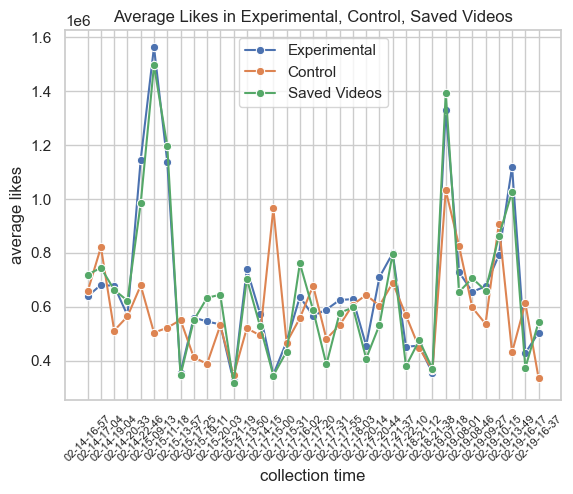

In [24]:
#creating graphics for likes 
sns.set(style="whitegrid")
plt_likes_all = sns.lineplot(x='run', y='experimental', data=average_likes, label = 'Experimental', marker ='o')
sns.lineplot(x='run', y='control', data=average_likes, label = 'Control', marker ='o')
sns.lineplot(x='run', y='saved videos', data=average_likes, label = 'Saved Videos', marker ='o')
plt_likes_all.set_xlabel('collection time')
plt_likes_all.set_ylabel('average likes')
plt_likes_all.set_title('Average Likes in Experimental, Control, Saved Videos')
plt_likes_all.set_xticks(ticks=range(len(all_saved_video_dfs)), labels=average_likes.run, rotation=45, fontsize=8)

mpl.savefig('likes_ALL.png')

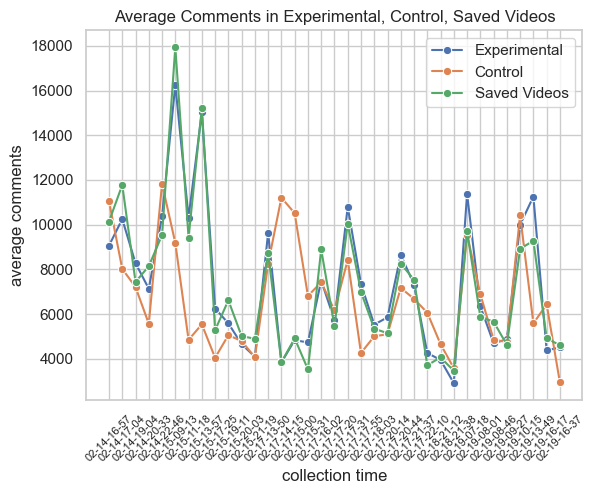

In [25]:
#creating graphics for comments 
plt_comments_all = sns.lineplot(x='run', y='experimental', data=average_comments, label = 'Experimental', marker ='o')
sns.lineplot(x='run', y='control', data=average_comments, label = 'Control', marker ='o')
sns.lineplot(x='run', y='saved videos', data=average_comments, label = 'Saved Videos', marker ='o')
plt_comments_all.set_xlabel('collection time')
plt_comments_all.set_ylabel('average comments')
plt_comments_all.set_title('Average Comments in Experimental, Control, Saved Videos')
plt_comments_all.set_xticks(ticks=range(len(all_saved_video_dfs)), labels=average_likes.run, rotation=45, fontsize=8)

mpl.savefig('comments_ALL.png')

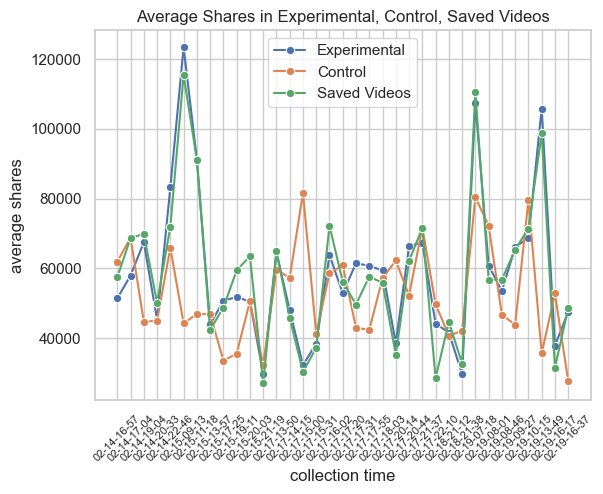

In [26]:
#creating graphics for shares 
plt_shares_all = sns.lineplot(x='run', y='experimental', data=average_shares, label = 'Experimental', marker ='o')
sns.lineplot(x='run', y='control', data=average_shares, label = 'Control', marker ='o')
sns.lineplot(x='run', y='saved videos', data=average_shares, label = 'Saved Videos', marker ='o')
plt_shares_all.set_xlabel('collection time')
plt_shares_all.set_ylabel('average shares')
plt_shares_all.set_title('Average Shares in Experimental, Control, Saved Videos')
plt_shares_all.set_xticks(ticks=range(len(all_saved_video_dfs)), labels=average_likes.run, rotation=45, fontsize=8)

mpl.savefig('shares_ALL.png')

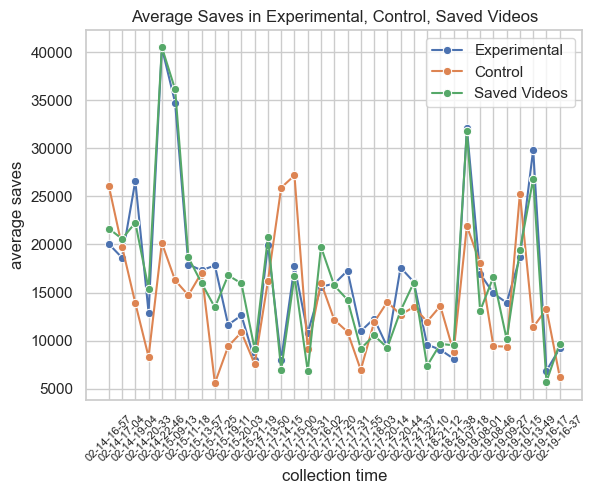

In [27]:
#creating graphics for saves 
plt_saves_all = sns.lineplot(x='run', y='experimental', data=average_saves, label = 'Experimental', marker ='o')
sns.lineplot(x='run', y='control', data=average_saves, label = 'Control', marker ='o')
sns.lineplot(x='run', y='saved videos', data=average_saves, label = 'Saved Videos', marker ='o')
plt_saves_all.set_xlabel('collection time')
plt_saves_all.set_ylabel('average saves')
plt_saves_all.set_title('Average Saves in Experimental, Control, Saved Videos')
plt_saves_all.set_xticks(ticks=range(len(all_saved_video_dfs)), labels=average_likes.run, rotation=45, fontsize=8)

mpl.savefig('saves_ALL.png')

## 6. Popularity Analysis by User over Time <a id=by-user-over-time></a>

In [28]:
def getAverageMetricsTestRun(popularity_metric, test_run):
    """
    This function takes in a popularity metric (likes/shares/comments/saves) as a parameter. It also takes test_run as a parameter which is 
    the initial of a person to isolate a specific test run. 
    It calculates the average of that metric 
    in different runs for control group, experimental groups and the videos that were randomly saved for a specific test run. 
    The output is a dataframe where the columns are control, experimental and saved video
    groups and the rows are averages for that run. 
    """
    results = pd.DataFrame({'timestamp': [], 'control':[], 'experimental': [], 'saved videos': []})
    for i in range(len(all_saved_video_dfs)):
        if all_saved_video_dfs[i].Initials[0] == test_run:
            time = all_saved_video_dfs[i].collectionTime[0]
            #calculating the average of the metric for each run
            average_control = round(all_runs_control[i][popularity_metric].mean(), 2)
            average_exp = round(all_runs_exp[i][popularity_metric].mean(), 2)
            average_saved_videos = round(all_saved_video_dfs[i][popularity_metric].mean(), 2)

            #appending these averages to the result dataframes
            results.loc[len(results.index)] = [time, average_control, average_exp, average_saved_videos] 

    #returning the dataframe
    return results
    

In [29]:
#testing code
likes_timeseries = getAverageMetricsTestRun('likes', 'MG')
likes_timeseries

,timestamp,control,experimental,saved videos
0,02-17-17-31,480338.77,589381.63,385203.83
1,02-17-17-55,531080.84,624735.94,576930.06
2,02-17-20-44,603424.90,709556.50,531936.13
3,02-17-22-10,567962.46,450788.21,378972.87
4,02-19-10-15,907616.81,790734.92,861182.36
5,02-19-16-17,613391.38,427623.87,372226.12
6,02-19-16-37,334932.74,503850.93,542381.00


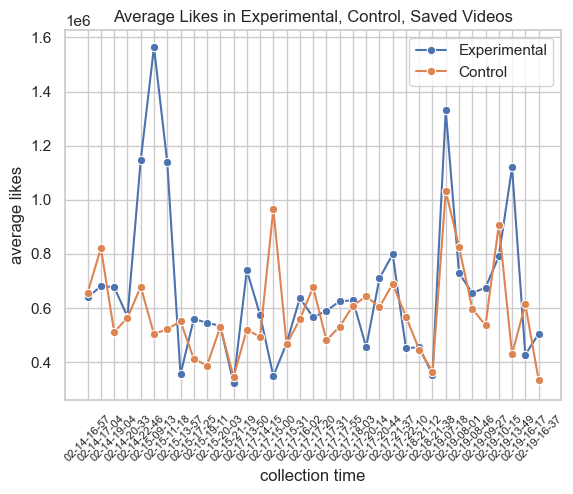

In [30]:
#plotting timeseries graphic for likes 
sns.set(style="whitegrid")
plt_likes_ts = sns.lineplot(x='run', y='experimental', data=average_likes, label = 'Experimental', marker ='o')
sns.lineplot(x='run', y='control', data=average_likes, label = 'Control', marker ='o')
#sns.lineplot(x='run', y='saved videos', data=average_likes, label = 'Saved Videos', marker ='o')
plt_likes_ts.set_xlabel('collection time')
plt_likes_ts.set_ylabel('average likes')
plt_likes_ts.set_title('Average Likes in Experimental, Control, Saved Videos')
plt_likes_ts.set_xticks(ticks=range(len(all_saved_video_dfs)), labels=average_likes.run, rotation=45, fontsize=8)

mpl.savefig('likes_TS.png')

In [31]:
#Creating dfs for every unique initials value
unique_initials = np.unique(initials)
unique_initials = list(unique_initials[:4])
unique_initials

['AY', 'JK', 'JR', 'MG']

In [33]:
#TEST RUN 1
likes_timeseries1 = getAverageMetricsTestRun('likes', 'AY')
comments_timeseries1 = getAverageMetricsTestRun('comments', 'AY')
shares_timeseries1 = getAverageMetricsTestRun('shares', 'AY')
saves_timeseries1 = getAverageMetricsTestRun('saves', 'AY')

#TEST RUN 2
likes_timeseries2 = getAverageMetricsTestRun('likes', 'JK')
comments_timeseries2 = getAverageMetricsTestRun('comments', 'JK')
shares_timeseries2 = getAverageMetricsTestRun('shares', 'JK')
saves_timeseries2 = getAverageMetricsTestRun('saves', 'JK')

#TEST RUN 3
likes_timeseries3 = getAverageMetricsTestRun('likes', 'JR')
comments_timeseries3 = getAverageMetricsTestRun('comments', 'JR')
shares_timeseries3 = getAverageMetricsTestRun('shares', 'JR')
saves_timeseries3 = getAverageMetricsTestRun('saves', 'JR')

#TEST RUN 4
likes_timeseries4 = getAverageMetricsTestRun('likes', 'MG')
comments_timeseries4 = getAverageMetricsTestRun('comments', 'MG')
shares_timeseries4 = getAverageMetricsTestRun('shares', 'MG')
saves_timeseries4 = getAverageMetricsTestRun('saves', 'MG')

In [34]:
likes_timeseries1

,timestamp,control,experimental,saved videos
0,02-14-16-57,656877.54,638859.33,719036.80
1,02-14-19-04,511200.34,676940.82,662626.84
2,02-14-22-46,678802.59,1146444.71,984626.41
3,02-15-09-13,503530.24,1564103.49,1496567.44
4,02-15-11-18,521647.96,1138600.43,1198262.88
5,02-15-13-57,550674.89,354334.72,344311.62
6,02-19-13-49,430034.03,1119312.26,1026528.58


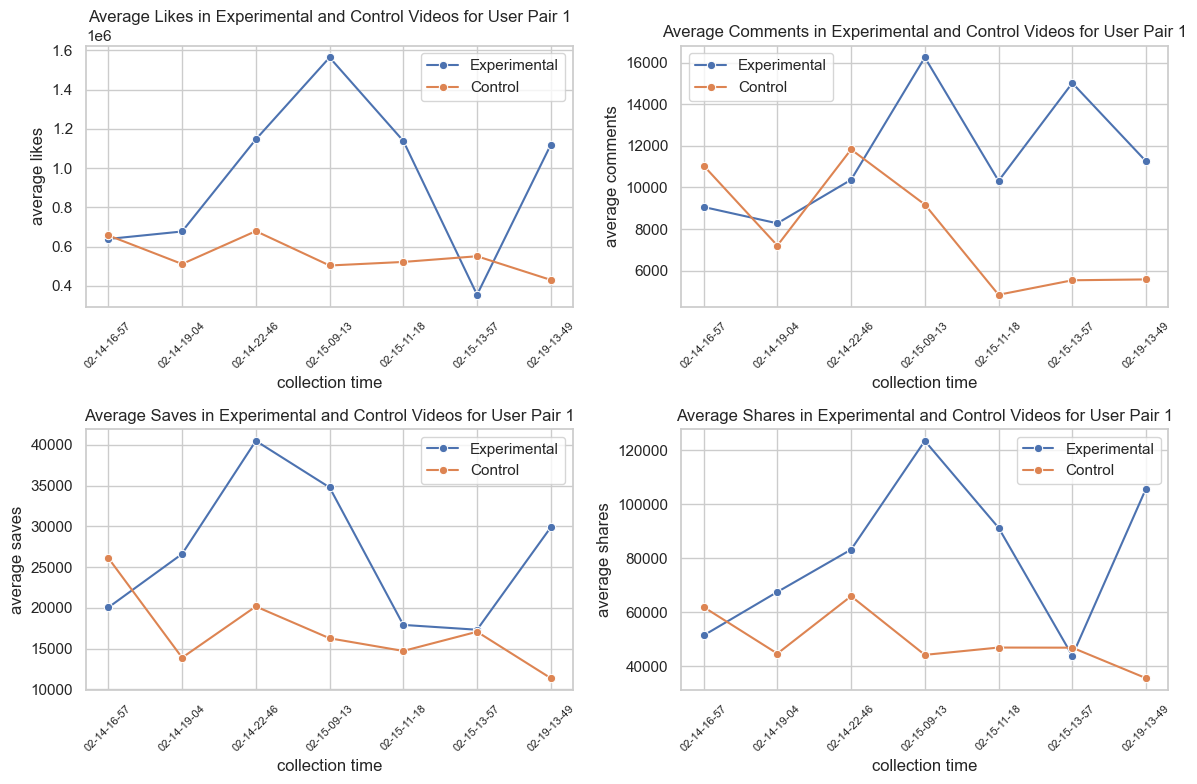

In [44]:
#FIGURES FOR USER PAIR 1
sns.set(style="whitegrid")
fig, axes = mpl.subplots(2, 2, figsize=(12, 8))

#likes
sns.lineplot(x='timestamp', y='experimental', data=likes_timeseries1, label = 'Experimental', marker ='o', ax=axes[0, 0])
sns.lineplot(x='timestamp', y='control', data=likes_timeseries1, label = 'Control', marker ='o', ax=axes[0, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=likes_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[0, 0])
axes[0, 0].set_xlabel('collection time')
axes[0, 0].set_ylabel('average likes')
axes[0, 0].set_title('Average Likes in Experimental and Control Videos for User Pair 1')
axes[0, 0].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)



#comments
sns.lineplot(x='timestamp', y='experimental', data=comments_timeseries1, label = 'Experimental', marker ='o', ax=axes[0, 1])
sns.lineplot(x='timestamp', y='control', data=comments_timeseries1, label = 'Control', marker ='o',  ax=axes[0, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=comments_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[0, 1])
axes[0, 1].set_xlabel('collection time')
axes[0, 1].set_ylabel('average comments')
axes[0, 1].set_title('Average Comments in Experimental and Control Videos for User Pair 1')
axes[0, 1].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)

#shares
sns.lineplot(x='timestamp', y='experimental', data=shares_timeseries1, label = 'Experimental', marker ='o', ax=axes[1, 1])
sns.lineplot(x='timestamp', y='control', data=shares_timeseries1, label = 'Control', marker ='o',  ax=axes[1, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=shares_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[1, 1])
axes[1, 1].set_xlabel('collection time')
axes[1, 1].set_ylabel('average shares')
axes[1, 1].set_title('Average Shares in Experimental and Control Videos for User Pair 1')
axes[1, 1].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)

#saves
sns.lineplot(x='timestamp', y='experimental', data=saves_timeseries1, label = 'Experimental', marker ='o', ax=axes[1, 0])
sns.lineplot(x='timestamp', y='control', data=saves_timeseries1, label = 'Control', marker ='o',  ax=axes[1, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=saves_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[1, 0])
axes[1, 0].set_xlabel('collection time')
axes[1, 0].set_ylabel('average saves')
axes[1, 0].set_title('Average Saves in Experimental and Control Videos for User Pair 1')
axes[1, 0].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)


mpl.tight_layout()
mpl.savefig('user1AY.png')

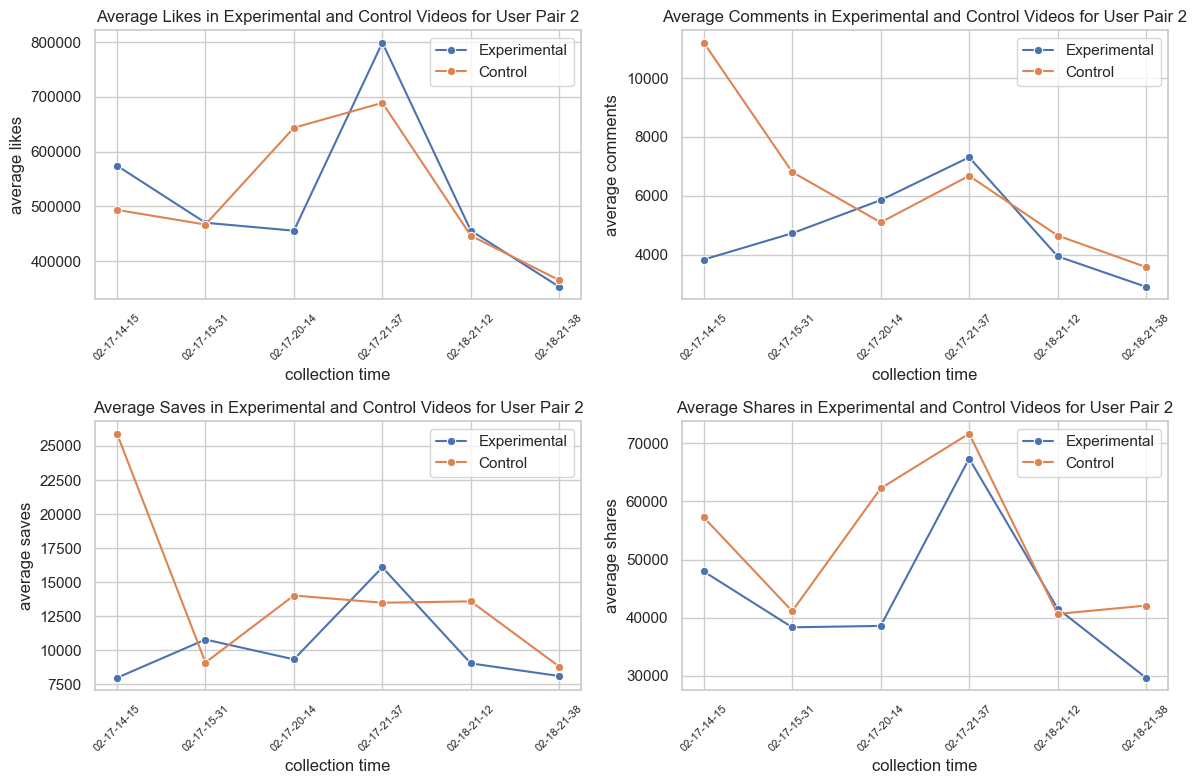

In [40]:
#FIGURES FOR USER PAIR 2
sns.set(style="whitegrid")
fig, axes = mpl.subplots(2, 2, figsize=(12, 8))

#likes
sns.lineplot(x='timestamp', y='experimental', data=likes_timeseries2, label = 'Experimental', marker ='o', ax=axes[0, 0])
sns.lineplot(x='timestamp', y='control', data=likes_timeseries2, label = 'Control', marker ='o', ax=axes[0, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=likes_timeseries2, label = 'Saved Videos', marker ='o', ax=axes[0, 0])
axes[0, 0].set_xlabel('collection time')
axes[0, 0].set_ylabel('average likes')
axes[0, 0].set_title('Average Likes in Experimental and Control Videos for User Pair 2')
axes[0, 0].set_xticks(ticks = range(likes_timeseries2.shape[0]), labels=likes_timeseries2.timestamp, rotation=45, fontsize=8)


#comments
sns.lineplot(x='timestamp', y='experimental', data=comments_timeseries2, label = 'Experimental', marker ='o', ax=axes[0, 1])
sns.lineplot(x='timestamp', y='control', data=comments_timeseries2, label = 'Control', marker ='o',  ax=axes[0, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=comments_timeseries2, label = 'Saved Videos', marker ='o', ax=axes[0, 1])
axes[0, 1].set_xlabel('collection time')
axes[0, 1].set_ylabel('average comments')
axes[0, 1].set_title('Average Comments in Experimental and Control Videos for User Pair 2')
axes[0, 1].set_xticks(ticks = range(likes_timeseries2.shape[0]), labels=likes_timeseries2.timestamp, rotation=45, fontsize=8)

#shares
sns.lineplot(x='timestamp', y='experimental', data=shares_timeseries2, label = 'Experimental', marker ='o', ax=axes[1, 1])
sns.lineplot(x='timestamp', y='control', data=shares_timeseries2, label = 'Control', marker ='o',  ax=axes[1, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=shares_timeseries2, label = 'Saved Videos', marker ='o', ax=axes[1, 1])
axes[1, 1].set_xlabel('collection time')
axes[1, 1].set_ylabel('average shares')
axes[1, 1].set_title('Average Shares in Experimental and Control Videos for User Pair 2')
axes[1, 1].set_xticks(ticks = range(likes_timeseries2.shape[0]), labels=likes_timeseries2.timestamp, rotation=45, fontsize=8)

#saves
sns.lineplot(x='timestamp', y='experimental', data=saves_timeseries2, label = 'Experimental', marker ='o', ax=axes[1, 0])
sns.lineplot(x='timestamp', y='control', data=saves_timeseries2, label = 'Control', marker ='o',  ax=axes[1, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=saves_timeseries2, label = 'Saved Videos', marker ='o', ax=axes[1, 0])
axes[1, 0].set_xlabel('collection time')
axes[1, 0].set_ylabel('average saves')
axes[1, 0].set_title('Average Saves in Experimental and Control Videos for User Pair 2')
axes[1, 0].set_xticks(ticks = range(likes_timeseries2.shape[0]), labels=likes_timeseries2.timestamp, rotation=45, fontsize=8)


mpl.tight_layout()
mpl.savefig('user2JK.png')

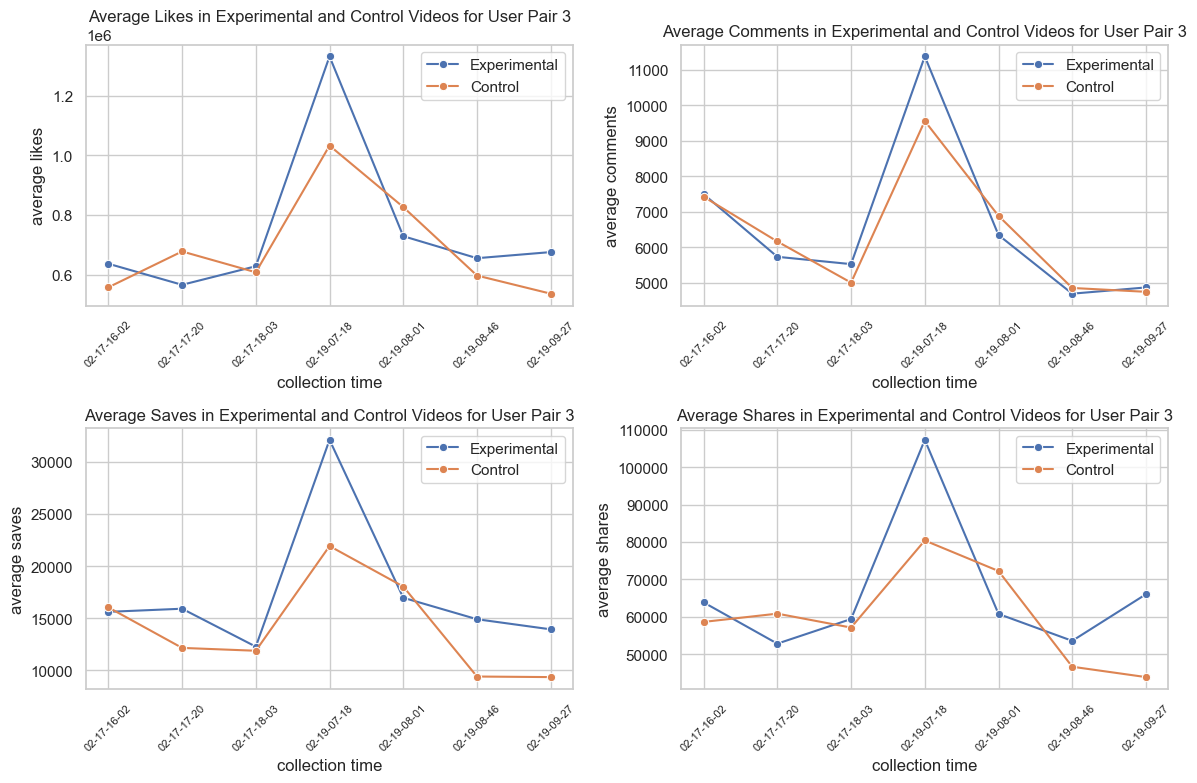

In [41]:
#FIGURES FOR USER PAIR 3
sns.set(style="whitegrid")
fig, axes = mpl.subplots(2, 2, figsize=(12, 8))

#likes
sns.lineplot(x='timestamp', y='experimental', data=likes_timeseries3, label = 'Experimental', marker ='o', ax=axes[0, 0])
sns.lineplot(x='timestamp', y='control', data=likes_timeseries3, label = 'Control', marker ='o', ax=axes[0, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=likes_timeseries3, label = 'Saved Videos', marker ='o', ax=axes[0, 0])
axes[0, 0].set_xlabel('collection time')
axes[0, 0].set_ylabel('average likes')
axes[0, 0].set_title('Average Likes in Experimental and Control Videos for User Pair 3')
axes[0, 0].set_xticks(ticks = range(likes_timeseries3.shape[0]), labels=likes_timeseries3.timestamp, rotation=45, fontsize=8)


#comments
sns.lineplot(x='timestamp', y='experimental', data=comments_timeseries3, label = 'Experimental', marker ='o', ax=axes[0, 1])
sns.lineplot(x='timestamp', y='control', data=comments_timeseries3, label = 'Control', marker ='o',  ax=axes[0, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=comments_timeseries3, label = 'Saved Videos', marker ='o', ax=axes[0, 1])
axes[0, 1].set_xlabel('collection time')
axes[0, 1].set_ylabel('average comments')
axes[0, 1].set_title('Average Comments in Experimental and Control Videos for User Pair 3')
axes[0, 1].set_xticks(ticks = range(likes_timeseries3.shape[0]), labels=likes_timeseries3.timestamp, rotation=45, fontsize=8)

#shares
sns.lineplot(x='timestamp', y='experimental', data=shares_timeseries3, label = 'Experimental', marker ='o', ax=axes[1, 1])
sns.lineplot(x='timestamp', y='control', data=shares_timeseries3, label = 'Control', marker ='o',  ax=axes[1, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=shares_timeseries3, label = 'Saved Videos', marker ='o', ax=axes[1, 1])
axes[1, 1].set_xlabel('collection time')
axes[1, 1].set_ylabel('average shares')
axes[1, 1].set_title('Average Shares in Experimental and Control Videos for User Pair 3')
axes[1, 1].set_xticks(ticks = range(likes_timeseries3.shape[0]), labels=likes_timeseries3.timestamp, rotation=45, fontsize=8)

#saves
sns.lineplot(x='timestamp', y='experimental', data=saves_timeseries3, label = 'Experimental', marker ='o', ax=axes[1, 0])
sns.lineplot(x='timestamp', y='control', data=saves_timeseries3, label = 'Control', marker ='o',  ax=axes[1, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=saves_timeseries3, label = 'Saved Videos', marker ='o', ax=axes[1, 0])
axes[1, 0].set_xlabel('collection time')
axes[1, 0].set_ylabel('average saves')
axes[1, 0].set_title('Average Saves in Experimental and Control Videos for User Pair 3')
axes[1, 0].set_xticks(ticks = range(likes_timeseries3.shape[0]), labels=likes_timeseries3.timestamp, rotation=45, fontsize=8)


mpl.tight_layout()
mpl.savefig('user3JR.png')

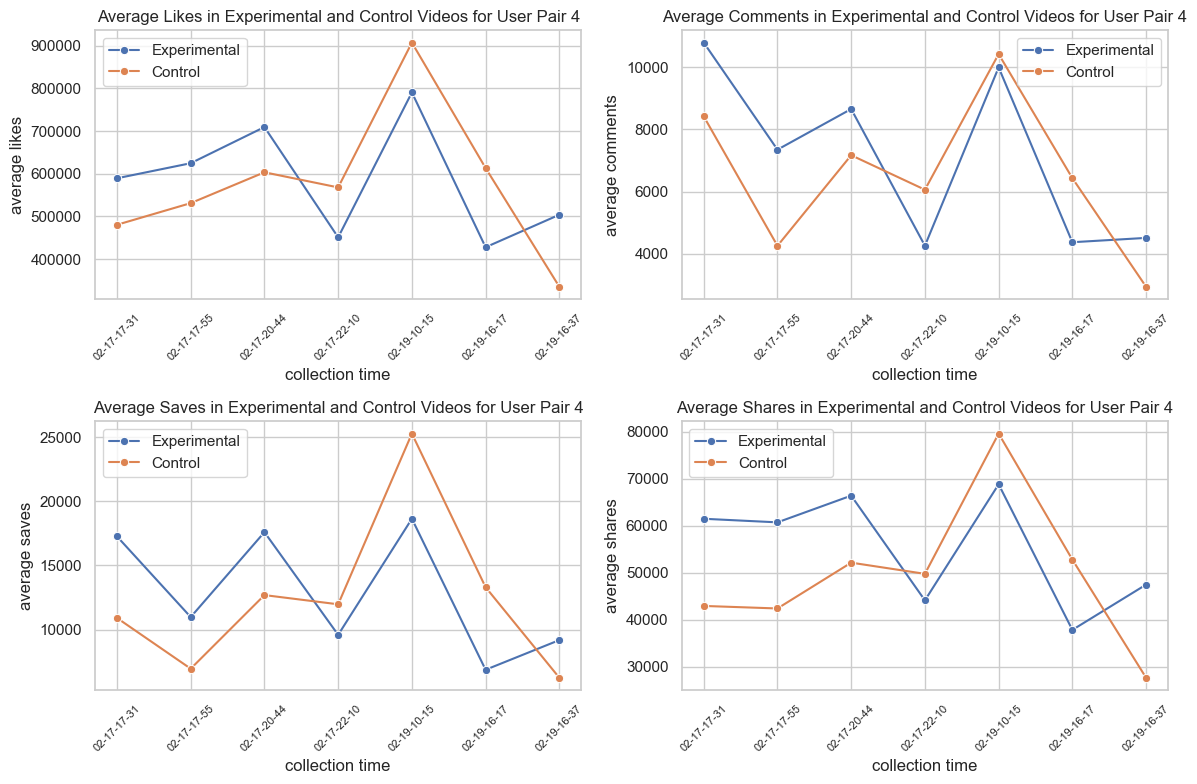

In [42]:
#FIGURES FOR USER PAIR 4
sns.set(style="whitegrid")
fig, axes = mpl.subplots(2, 2, figsize=(12, 8))

#likes
sns.lineplot(x='timestamp', y='experimental', data=likes_timeseries4, label = 'Experimental', marker ='o', ax=axes[0, 0])
sns.lineplot(x='timestamp', y='control', data=likes_timeseries4, label = 'Control', marker ='o', ax=axes[0, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=likes_timeseries4, label = 'Saved Videos', marker ='o', ax=axes[0, 0])
axes[0, 0].set_xlabel('collection time')
axes[0, 0].set_ylabel('average likes')
axes[0, 0].set_title('Average Likes in Experimental and Control Videos for User Pair 4')
axes[0, 0].set_xticks(ticks = range(likes_timeseries4.shape[0]), labels=likes_timeseries4.timestamp, rotation=45, fontsize=8)


#comments
sns.lineplot(x='timestamp', y='experimental', data=comments_timeseries4, label = 'Experimental', marker ='o', ax=axes[0, 1])
sns.lineplot(x='timestamp', y='control', data=comments_timeseries4, label = 'Control', marker ='o',  ax=axes[0, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=comments_timeseries4, label = 'Saved Videos', marker ='o', ax=axes[0, 1])
axes[0, 1].set_xlabel('collection time')
axes[0, 1].set_ylabel('average comments')
axes[0, 1].set_title('Average Comments in Experimental and Control Videos for User Pair 4')
axes[0, 1].set_xticks(ticks = range(likes_timeseries4.shape[0]), labels=likes_timeseries4.timestamp, rotation=45, fontsize=8)

#shares
sns.lineplot(x='timestamp', y='experimental', data=shares_timeseries4, label = 'Experimental', marker ='o', ax=axes[1, 1])
sns.lineplot(x='timestamp', y='control', data=shares_timeseries4, label = 'Control', marker ='o',  ax=axes[1, 1])
#sns.lineplot(x='timestamp', y='saved videos', data=shares_timeseries4, label = 'Saved Videos', marker ='o', ax=axes[1, 1])
axes[1, 1].set_xlabel('collection time')
axes[1, 1].set_ylabel('average shares')
axes[1, 1].set_title('Average Shares in Experimental and Control Videos for User Pair 4')
axes[1, 1].set_xticks(ticks = range(likes_timeseries4.shape[0]), labels=likes_timeseries4.timestamp, rotation=45, fontsize=8)

#saves
sns.lineplot(x='timestamp', y='experimental', data=saves_timeseries4, label = 'Experimental', marker ='o', ax=axes[1, 0])
sns.lineplot(x='timestamp', y='control', data=saves_timeseries4, label = 'Control', marker ='o',  ax=axes[1, 0])
#sns.lineplot(x='timestamp', y='saved videos', data=saves_timeseries4, label = 'Saved Videos', marker ='o', ax=axes[1, 0])
axes[1, 0].set_xlabel('collection time')
axes[1, 0].set_ylabel('average saves')
axes[1, 0].set_title('Average Saves in Experimental and Control Videos for User Pair 4')
axes[1, 0].set_xticks(ticks = range(likes_timeseries4.shape[0]), labels=likes_timeseries4.timestamp, rotation=45, fontsize=8)


mpl.tight_layout()
mpl.savefig('user4MG.png')

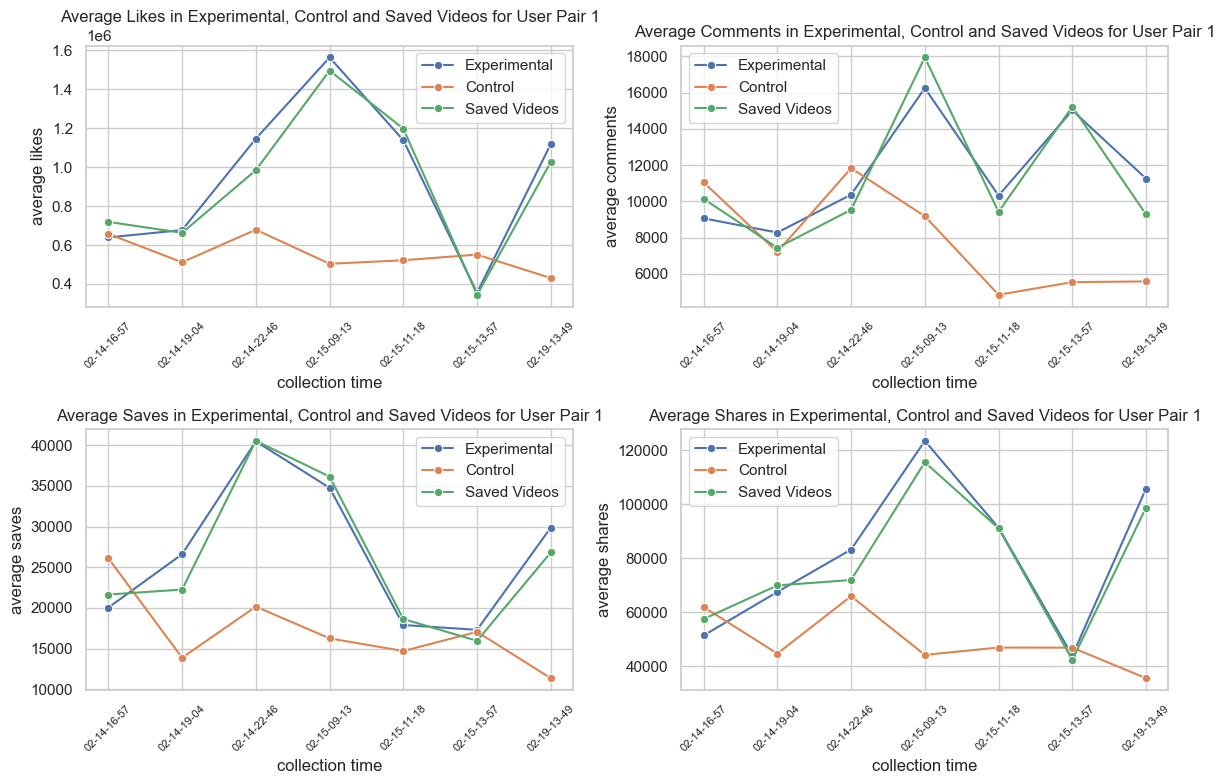

In [45]:
#FIGURES FOR USER PAIR 1 INCLUDING SAVED VIDEOS
sns.set(style="whitegrid")
fig, axes = mpl.subplots(2, 2, figsize=(12, 8))

#likes
sns.lineplot(x='timestamp', y='experimental', data=likes_timeseries1, label = 'Experimental', marker ='o', ax=axes[0, 0])
sns.lineplot(x='timestamp', y='control', data=likes_timeseries1, label = 'Control', marker ='o', ax=axes[0, 0])
sns.lineplot(x='timestamp', y='saved videos', data=likes_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[0, 0])
axes[0, 0].set_xlabel('collection time')
axes[0, 0].set_ylabel('average likes')
axes[0, 0].set_title('Average Likes in Experimental, Control and Saved Videos for User Pair 1')
axes[0, 0].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)



#comments
sns.lineplot(x='timestamp', y='experimental', data=comments_timeseries1, label = 'Experimental', marker ='o', ax=axes[0, 1])
sns.lineplot(x='timestamp', y='control', data=comments_timeseries1, label = 'Control', marker ='o',  ax=axes[0, 1])
sns.lineplot(x='timestamp', y='saved videos', data=comments_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[0, 1])
axes[0, 1].set_xlabel('collection time')
axes[0, 1].set_ylabel('average comments')
axes[0, 1].set_title('Average Comments in Experimental, Control and Saved Videos for User Pair 1')
axes[0, 1].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)

#shares
sns.lineplot(x='timestamp', y='experimental', data=shares_timeseries1, label = 'Experimental', marker ='o', ax=axes[1, 1])
sns.lineplot(x='timestamp', y='control', data=shares_timeseries1, label = 'Control', marker ='o',  ax=axes[1, 1])
sns.lineplot(x='timestamp', y='saved videos', data=shares_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[1, 1])
axes[1, 1].set_xlabel('collection time')
axes[1, 1].set_ylabel('average shares')
axes[1, 1].set_title('Average Shares in Experimental, Control and Saved Videos for User Pair 1')
axes[1, 1].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)

#saves
sns.lineplot(x='timestamp', y='experimental', data=saves_timeseries1, label = 'Experimental', marker ='o', ax=axes[1, 0])
sns.lineplot(x='timestamp', y='control', data=saves_timeseries1, label = 'Control', marker ='o',  ax=axes[1, 0])
sns.lineplot(x='timestamp', y='saved videos', data=saves_timeseries1, label = 'Saved Videos', marker ='o', ax=axes[1, 0])
axes[1, 0].set_xlabel('collection time')
axes[1, 0].set_ylabel('average saves')
axes[1, 0].set_title('Average Saves in Experimental, Control and Saved Videos for User Pair 1')
axes[1, 0].set_xticks(ticks = range(likes_timeseries1.shape[0]), labels=likes_timeseries1.timestamp, rotation=45, fontsize=8)


mpl.tight_layout()
mpl.savefig('user1CAS.png')